In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os

%matplotlib inline

Welcome to JupyROOT 6.12/06


Let's get the versions numbers we want to create comparison plots of. These should have already had all of the plots generated using the productionFeedback module.

In [6]:
versionNumbers = ["v9_23_00_EndGame","v9_19_01_Endgame"]
versionPaths = ["./images/"+x+"/" for x in versionNumbers]
print(versionNumbers)

['v9_23_00_EndGame', 'v9_19_01_Endgame']


Lets first look at the farlineHistograms canvas

In [9]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_farlineHistograms.root")
    f.ls()
    c = f.Get("c")
#    c.Draw()
    prims = list(c.GetListOfPrimitives())
    for x in prims:
        #print(list(x.GetListOfPrimitives())[1])
        h = list(x.GetListOfPrimitives())[1].Clone()
        h.SetDirectory(0)
        histVec.append(h)
        print(h)
    
    f.Close()
print(histVec)

./images/v9_23_00_EndGame/
<ROOT.TH1D object ("allCaloEnergies") at 0x7fffbf563c30>
<ROOT.TH1D object ("allCaloWiggle") at 0x7fffbf569390>
<ROOT.TH1D object ("allCaloTimes") at 0x7fffbf569970>
<ROOT.TH1D object ("farlineCTag") at 0x7fffbf562450>
./images/v9_19_01_Endgame/
<ROOT.TH1D object ("allCaloEnergies") at 0x7fffbf576400>
<ROOT.TH1D object ("allCaloWiggle") at 0x7fffbf55f6f0>
<ROOT.TH1D object ("allCaloTimes") at 0x7fffbf55fae0>
<ROOT.TH1D object ("farlineCTag") at 0x7fffbf568590>
[<ROOT.TH1D object ("allCaloEnergies") at 0x7fffbf563c30>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffbf569390>, <ROOT.TH1D object ("allCaloTimes") at 0x7fffbf569970>, <ROOT.TH1D object ("farlineCTag") at 0x7fffbf562450>, <ROOT.TH1D object ("allCaloEnergies") at 0x7fffbf576400>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffbf55f6f0>, <ROOT.TH1D object ("allCaloTimes") at 0x7fffbf55fae0>, <ROOT.TH1D object ("farlineCTag") at 0x7fffbf568590>]
TFile**		./images/v9_23_00_EndGame/v9_23_00_EndGame_farlineHi

v9_23_00_EndGame
v9_19_01_Endgame


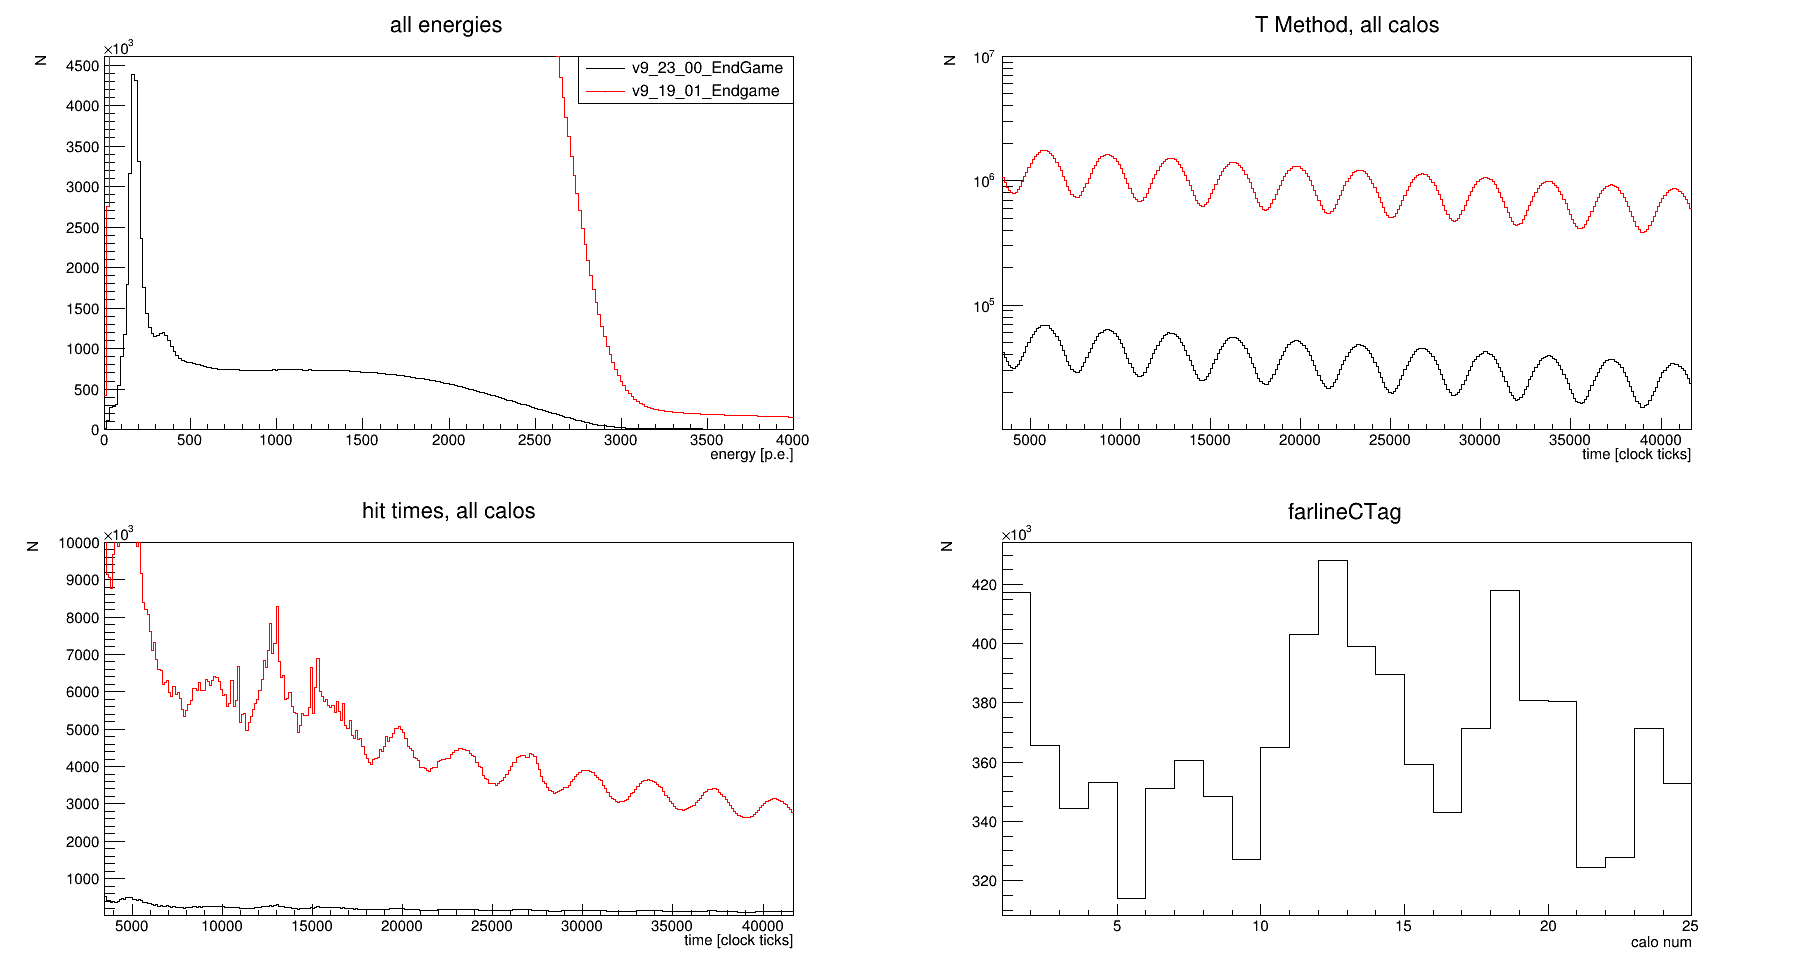

In [10]:
n = len(versionPaths)
c = r.TCanvas("cNew","cNew",1800,1000)
c.Divide(2,2)

c.cd(1)
leg = r.TLegend(0.65,0.8,0.9,0.9)
for version in range(n):
    histVec[version*4+0].SetLineColor(version+1)
    if(version<0.9):
        histVec[version*4+0].Draw()
    else:
        histVec[version*4+0].Draw("SAME")
    leg.AddEntry(histVec[version*4+0],versionNumbers[version],"pl")
    print(versionNumbers[version])
leg.Draw()

c.cd(2)
r.gPad.SetLogy()
for version in range(n):
    histVec[version*4+1].SetLineColor(version+1)
    if(version<0.9):
        histVec[version*4+1].Draw()
        histVec[version*4+1].GetYaxis().SetRangeUser(10000,10000000)
    else:
        histVec[version*4+1].Draw("SAME")

c.cd(3)
for version in range(n):
    histVec[version*4+2].SetLineColor(version+1)
    if(version<0.9):
        histVec[version*4+2].Draw()
        histVec[version*4+2].GetYaxis().SetRangeUser(10000,10000000)
    else:
        histVec[version*4+2].Draw("SAME")

c.cd(4)
for version in range(n):
    histVec[version*4+3].SetLineColor(version+1)
    if(version<0.9):
        histVec[version*4+3].Draw()
    else:
        histVec[version*4+3].Draw("SAME")
    
    
c.Draw()

Now let's compare the 5 parameter fits for all of the calos

./images/v9_19_01/
[<ROOT.TKey object ("c") at 0x7fffddf45e70>]
[<ROOT.TFrame object ("TFrame") at 0x7fffde42a5a0>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffde435bb0>, <ROOT.TPaveText object ("title") at 0x7fffd9fee7c0>, <ROOT.TPad object ("upper_pad") at 0x7fffd9feeb70>, <ROOT.TPad object ("lower_pad") at 0x7fffd9fed1c0>, <ROOT.TPad object ("top_pad") at 0x7fffd9f7ff40>, <ROOT.TRatioPlot object ("TRatioPlot") at 0x7fffd9f7e5e0>]
./images/v9_19_01_Endgame/
[<ROOT.TKey object ("c") at 0x7fffde47d800>]
[<ROOT.TFrame object ("TFrame") at 0x7fffde27a8c0>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffde47bbc0>, <ROOT.TPaveText object ("title") at 0x7fffde47db70>, <ROOT.TPad object ("upper_pad") at 0x7fffde47df20>, <ROOT.TPad object ("lower_pad") at 0x7fffde47ab40>, <ROOT.TPad object ("top_pad") at 0x7fffde285020>, <ROOT.TRatioPlot object ("TRatioPlot") at 0x7fffde479230>]
[<ROOT.TH1D object ("allCaloWiggle") at 0x7fffde46a4b0>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffde479bd0>]
TFi

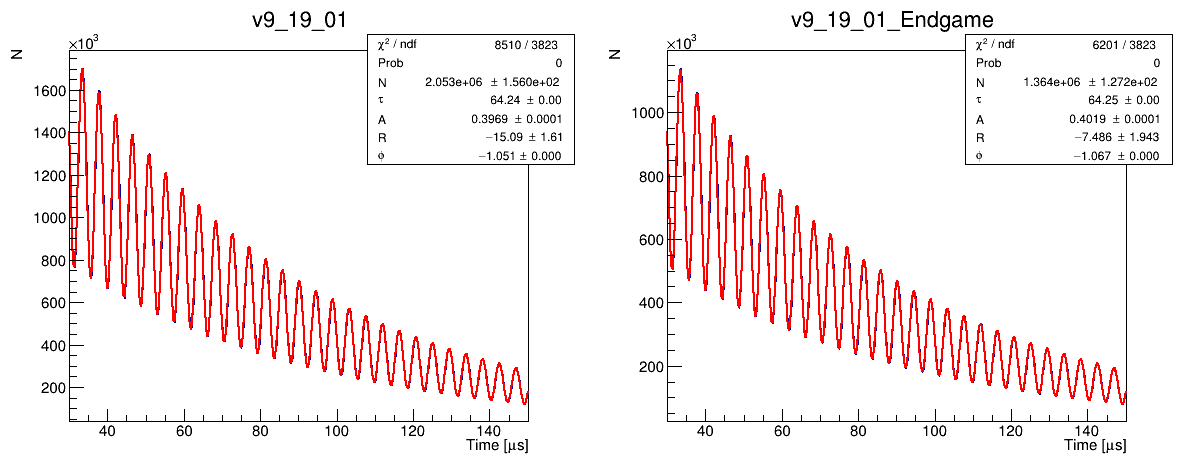

In [5]:
c4 = r.TCanvas("c4","c4",1200,500)
c4.Divide(int(len(versionPaths)),1)

histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_TmethodWiggleFitAllCalos.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    pad = prims[1].Clone()
    pad.SetDirectory(0)
    histVec.append(pad)
    
print(histVec)
    
for i in range(len(versionNumbers)):
    histVec[i].SetTitle(versionNumbers[i])
    c4.cd(i+1)
    histVec[i].Draw()
    
    
c4.Draw()

And the residuals

./images/v9_19_01/
[<ROOT.TKey object ("c1_n11") at 0x7fffddbc6f20>]
[<ROOT.TFrame object ("TFrame") at 0x7fffde477b60>, <ROOT.TH1D object ("out_MAG P") at 0x7fffde5cfb10>, <ROOT.TPaveText object ("title") at 0x7fffde47d800>]
./images/v9_19_01_Endgame/
[<ROOT.TKey object ("c1_n3") at 0x7fffde508320>]
[<ROOT.TFrame object ("TFrame") at 0x7fffddf4fd10>, <ROOT.TH1D object ("out_MAG P") at 0x7fffde4fce60>, <ROOT.TPaveText object ("title") at 0x7fffde4fc510>]
[<ROOT.TH1D object ("out_MAG P") at 0x7fffde504f80>, <ROOT.TH1D object ("out_MAG P") at 0x7fffde5f5140>]
TFile**		./images/v9_19_01/v9_19_01_5ParamResiduals.root	
 TFile*		./images/v9_19_01/v9_19_01_5ParamResiduals.root	
  KEY: TCanvas	c1_n11;1	c1_n11
TFile**		./images/v9_19_01_Endgame/v9_19_01_Endgame_5ParamResiduals.root	
 TFile*		./images/v9_19_01_Endgame/v9_19_01_Endgame_5ParamResiduals.root	
  KEY: TCanvas	c1_n3;1	c1_n3


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::SaveAs>: ROOT file hi.root has been created


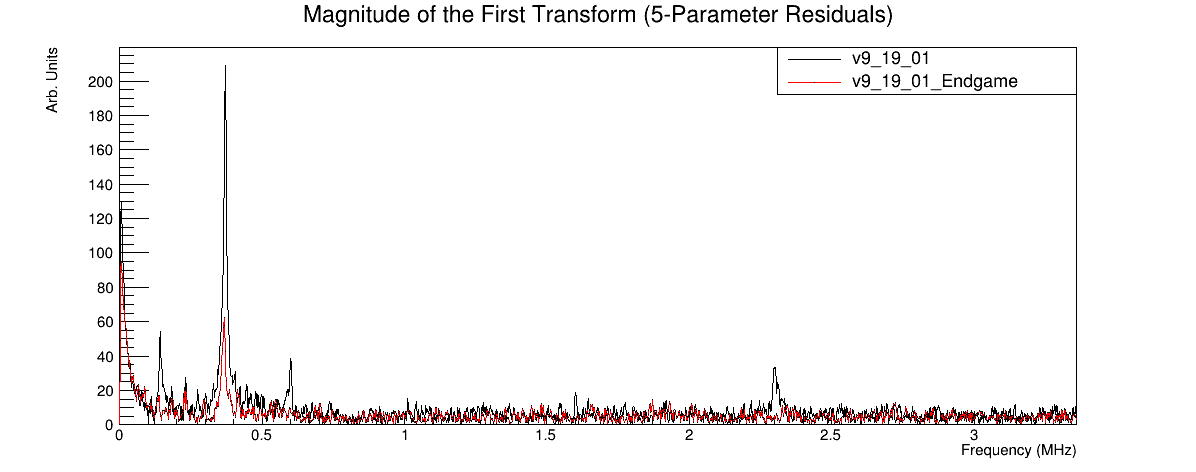

In [6]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_5ParamResiduals.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    hist = prims[1].Clone()
    hist.SetDirectory(0)
    histVec.append(hist)
   

c4 = r.TCanvas("c4","c4",1200,500)
leg = r.TLegend(0.65,0.8,0.9,0.9)
print(histVec)
for i, hist in enumerate(histVec):
    
    hist.SetLineColor(i+1)
    
    if i < 0.5:
        hist.Draw("HIST P0 L")
    else:
        hist.Draw("HIST P0 L SAME")
    leg.AddEntry(hist,versionNumbers[i],"pl")

leg.Draw()
#c4.SetLogy()
c4.Draw()
c4.Print("hi.root")

And now let's do the same for the 13-parameter fits

./images/v9_11_00/
[<ROOT.TKey object ("c1_n6") at 0x7ffff442b980>]
[<ROOT.TFrame object ("TFrame") at 0x7ffff42ec740>, <ROOT.TH1D object ("out_MAG P") at 0x7ffff42ec2e0>, <ROOT.TPaveText object ("title") at 0x7ffff42ed650>]
./images/v9_19_01/
[<ROOT.TKey object ("c1_n11") at 0x7ffff429d640>]
[<ROOT.TFrame object ("TFrame") at 0x7ffff4571dd0>, <ROOT.TH1D object ("out_MAG P") at 0x7ffff442bab0>, <ROOT.TPaveText object ("title") at 0x7ffff442ad60>]
[<ROOT.TH1D object ("out_MAG P") at 0x7ffff4417260>, <ROOT.TH1D object ("out_MAG P") at 0x7ffff442afc0>]
TFile**		./images/v9_11_00/v9_11_00_13ParamResiduals.root	
 TFile*		./images/v9_11_00/v9_11_00_13ParamResiduals.root	
  KEY: TCanvas	c1_n6;1	c1_n6
TFile**		./images/v9_19_01/v9_19_01_13ParamResiduals.root	
 TFile*		./images/v9_19_01/v9_19_01_13ParamResiduals.root	
  KEY: TCanvas	c1_n11;1	c1_n11


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4


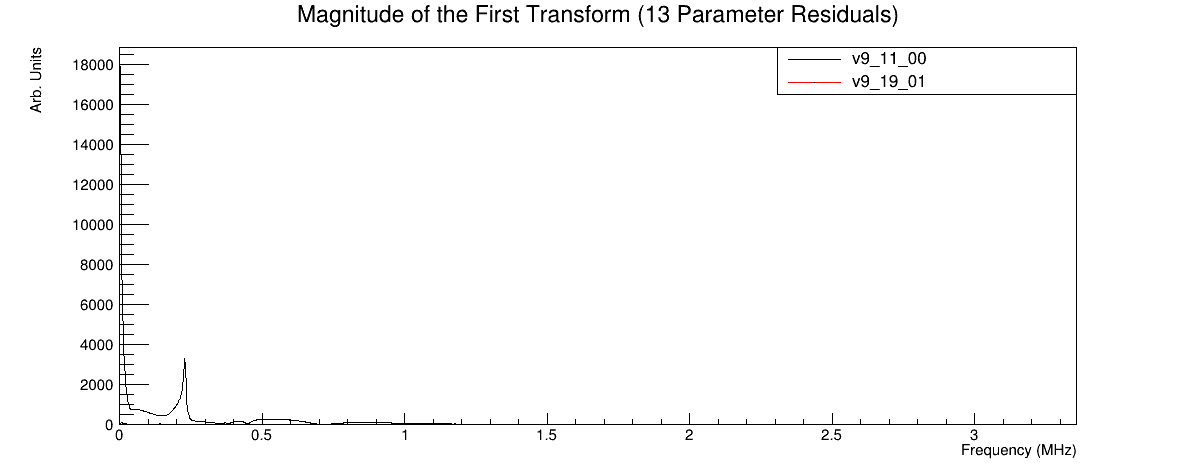

In [9]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_13ParamResiduals.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    hist = prims[1].Clone()
    hist.SetDirectory(0)
    histVec.append(hist)
   

c4 = r.TCanvas("c4","c4",1200,500)
leg = r.TLegend(0.65,0.8,0.9,0.9)
print(histVec)
for i, hist in enumerate(histVec):
    
    hist.SetLineColor(i+1)
    
    if i < 0.5:
        hist.Draw("HIST P0 L")
    else:
        hist.Draw("HIST P0 L SAME")
    leg.AddEntry(hist,versionNumbers[i],"pl")

leg.Draw()
c4.Draw()

./images/v9_19_01/
[<ROOT.TKey object ("c3") at 0x7fffde504570>]
[<ROOT.TFrame object ("TFrame") at 0x7fffde47ba30>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffde5c2610>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffde45ab20>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffde61b1e0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffde504f80>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffde7149d0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffde714e30>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffde72c4a0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffde72c930>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffde701020>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffde7014b0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffde701940>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffde6683c0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffde668850>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7fffde668d10>, <ROOT.TH1D object ("laserSyncEnergies") at 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4


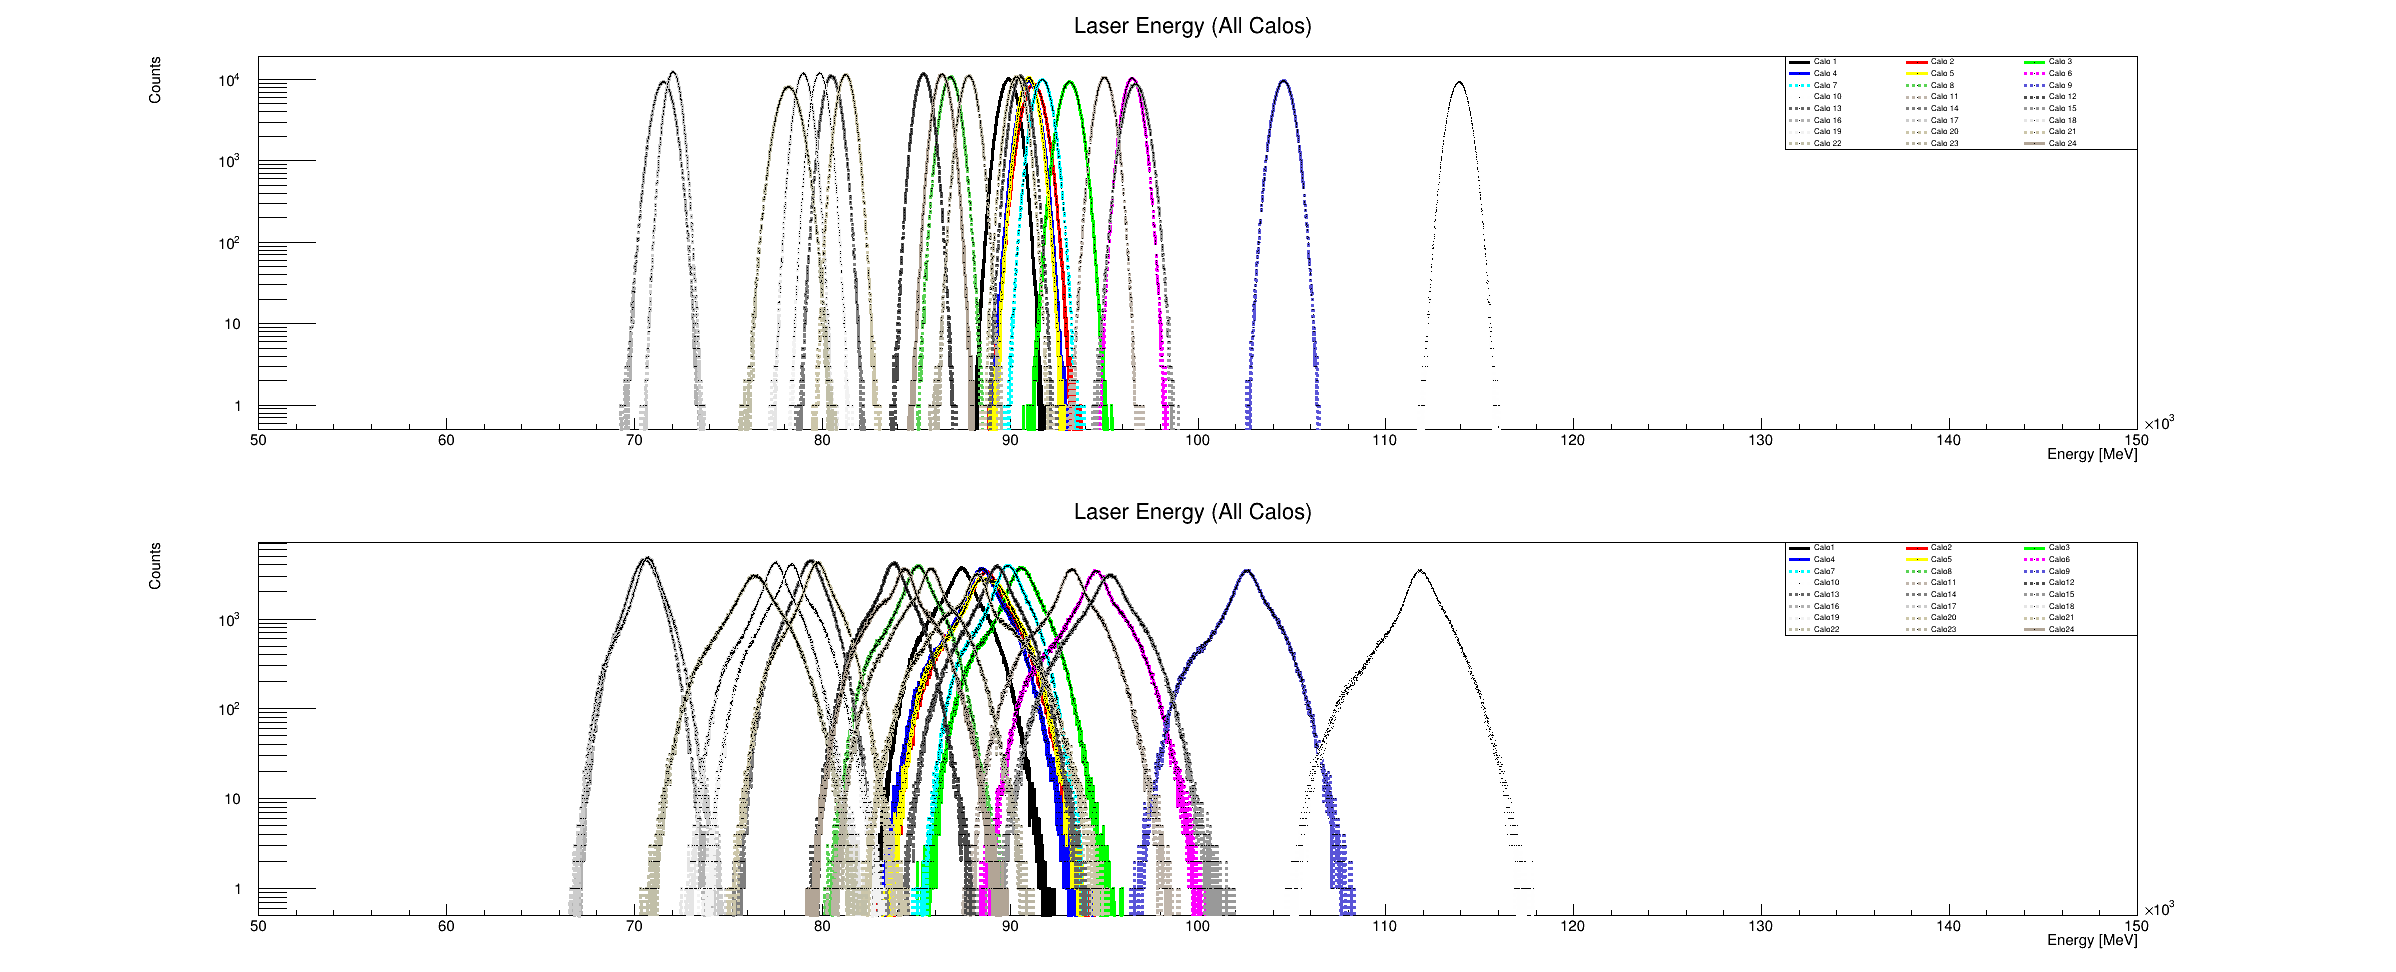

In [7]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_laserEnergyPulse_allcalo.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    for x in prims:
        if(str(type(x)) == "<class 'ROOT.TH1D'>"):
            hist = x.Clone()
            hist.SetDirectory(0)
            histVec.append(hist)
   

c4 = r.TCanvas("c4","c4",2400,1000)
c4.Divide(1,2)
c4.cd(0)
leg = r.TLegend(0.75,0.7,0.9,0.9)
leg.SetNColumns(3)
c4.cd(2)
leg2 = r.TLegend(0.75,0.7,0.9,0.9)
leg2.SetNColumns(3)

print(histVec)
for i, hist in enumerate(histVec):
    
    if i < 24:
        c4.cd(1)
        r.gPad.SetLogy()
        hist.SetLineColor(i+1)
    else:
        c4.cd(2)
        r.gPad.SetLogy()
        hist.SetLineColor((i-24)+1)
    
    if i < 0.5:
        hist.Draw("HIST P0 L")
    else:
        hist.Draw("HIST P0 L SAME")
    if i < 24:
        leg.AddEntry(hist,"Calo "+str(i+1),"pl")
    else:
        leg2.AddEntry(hist,"Calo"+str(i-24+1),"pl")

c4.cd(1)     
leg.Draw()
c4.cd(2)
leg2.Draw()
c4.Draw()

./images/v9_11_00/
[<ROOT.TKey object ("c3") at 0x7ffff44158f0>]
[<ROOT.TFrame object ("TFrame") at 0x7ffff444f130>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff45532f0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff45994c0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff444d880>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff458f830>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff4b3d5e0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff478e8f0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff478ed50>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff2b3d170>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff2b3d630>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff4570b90>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff4571050>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff4b3f9b0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff4b3fe70>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff4557b50>, <ROOT.TH1D object ("laserSyncEnergies") at 

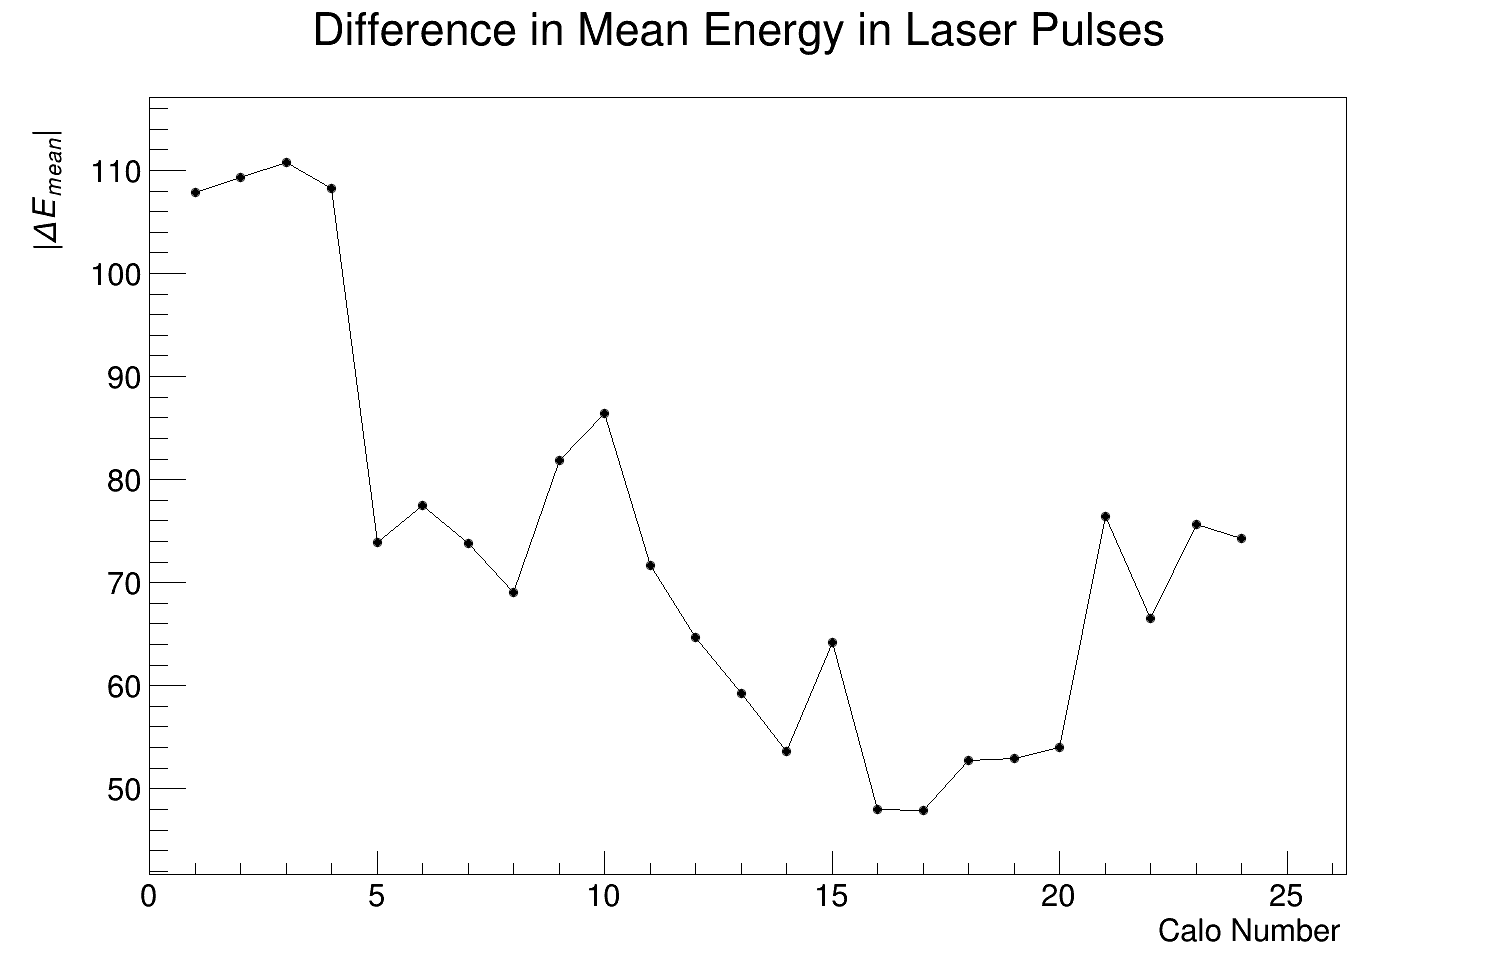

In [11]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_laserEnergyPulse_allcalo.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    for x in prims:
        if(str(type(x)) == "<class 'ROOT.TH1D'>"):
            hist = x.Clone()
            hist.SetDirectory(0)
            histVec.append(hist)
   

c5 = r.TCanvas("c5","c5",1500,1000)
leg = r.TLegend(0.75,0.7,0.9,0.9)
leg.SetNColumns(3)

print(histVec)

gr = r.TGraph()

for i in range(len(histVec)):
    if(i == 24):
        break
    h1 = histVec[i].Clone()
    h2 = histVec[i+24].Clone()
    
    diffMean = r.TMath.Abs(h1.GetMean() - h2.GetMean())
    
    gr.SetPoint(i, i+1, diffMean)
    
gr.SetTitle("Difference in Mean Energy in Laser Pulses")
gr.GetXaxis().SetTitle("Calo Number")
gr.GetYaxis().SetTitle("$ | \Delta E_{mean} | $")
gr.SetMarkerStyle(8)
gr.Draw("apl")
c5.Draw()

./images/v9_11_00/
[<ROOT.TKey object ("c3") at 0x7ffff4450b00>]
[<ROOT.TFrame object ("TFrame") at 0x7ffff4416930>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff50dde10>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff513fe90>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff516eda0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff516f190>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff44b5a70>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff44b5ed0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff45ac8f0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff45acd50>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff45a3bc0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff45a4020>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff45a4480>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff5165fc0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff5166480>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff5166940>, <ROOT.TH1D object ("laserSyncEnergies") at 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


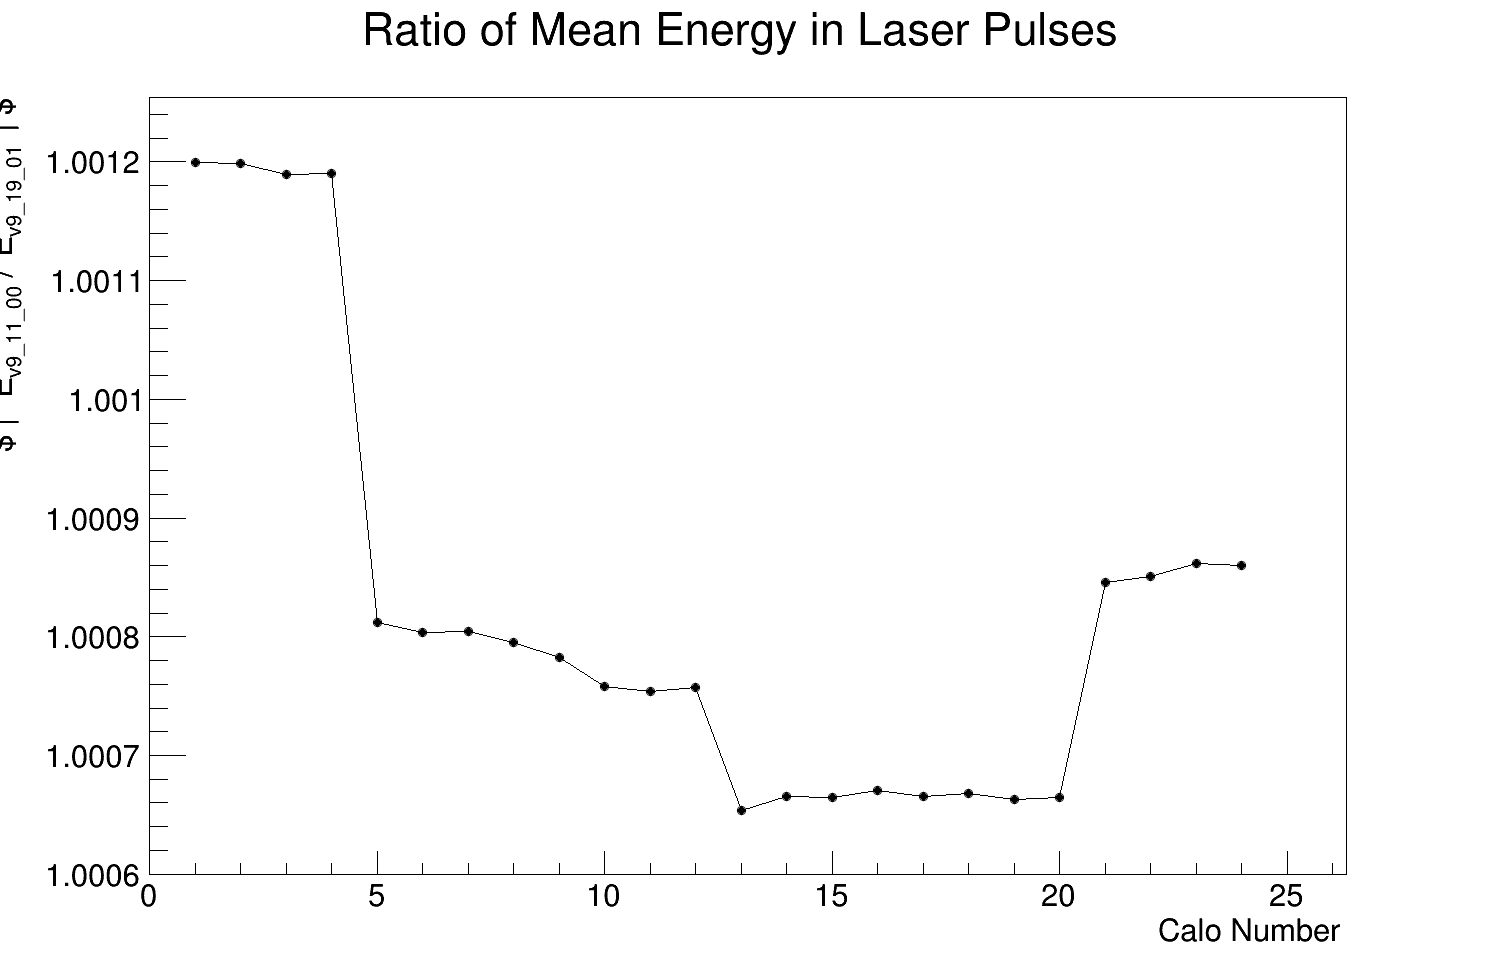

In [12]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_laserEnergyPulse_allcalo.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    for x in prims:
        if(str(type(x)) == "<class 'ROOT.TH1D'>"):
            hist = x.Clone()
            hist.SetDirectory(0)
            histVec.append(hist)
   

c5 = r.TCanvas("c5","c5",1500,1000)
leg = r.TLegend(0.75,0.7,0.9,0.9)
leg.SetNColumns(3)

print(histVec)

gr = r.TGraph()

for i in range(len(histVec)):
    if(i == 24):
        break
    h1 = histVec[i].Clone()
    h2 = histVec[i+24].Clone()
    
    diffMean = r.TMath.Abs(h1.GetMean() / h2.GetMean())
    
    gr.SetPoint(i, i+1, diffMean)
    
gr.SetTitle("Ratio of Mean Energy in Laser Pulses")
gr.GetXaxis().SetTitle("Calo Number")
gr.GetYaxis().SetTitle("$ |  #bar{E}_{"+versionNumbers[0]+"} / #bar{E}_{"+versionNumbers[1]+"}  | $")
gr.SetMarkerStyle(8)
gr.Draw("apl")

#gr.GetYaxis().SetRangeUser(0.75,1.25)

c5.Draw()